<a href="https://colab.research.google.com/github/denisddv/DEV-nas-estrelas-/blob/main/panda_ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


    mostrar os 3 deputados que mais e menos gastam

    realizar insights onde mostrem os valores totais dos ultimos 4 anos dos valores gastos por cada deputado

    mostrar os itens dos ultimos quatro anos onde se mais teve despesa 
    Os insights não se limitam aos pedidos acima , onde gostaríamos de pelo menos mais 2 

    Os resultados podem ou não trazer plotagem(trate como não obrigatório ) mas é recomendado que traga 

    verificar e contar os valores ausentes (NaN , NA , etc)

    Verificar e corrigir possíveis inconsistências nos dados que podem ser (Nomes diferentes para o mesmo item ex: TÁXI e taxi ) ou valores ausentes ou duplicidade de dados

    Montar uma pequena apresentação no próprio notebook trazendo uma organização e fluxo de ETL
    

In [ ]:
pip install gcsfs

In [ ]:
pip install pandera

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa

In [ ]:
pd.set_option('display.max_columns',100)

In [ ]:
serviceAccount = '/content/prime-script-377819-8f05e5581164.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
client = storage.Client() 
bucket = client.get_bucket('denisdorneles1')
bucket.blob('depsp')
path = 'gs://denisdorneles1/depsp.csv'

In [ ]:
df = pd.read_csv(path)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.00,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.40,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.00,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.00,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA
4,2015,300257,4,195.01,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...,...
542390,2007,300441,3,120.00,6306675000140.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",OPTEI EXPRESS LTDA.
542391,2007,300441,3,2096.80,52204617000122.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",CHURRASCARIA JANDA LTDA.
542392,2007,300441,3,13.48,62925474000282.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
542393,2007,300441,3,38.08,66747577000170.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",IBIZA EUROPEIA ALIMENTOS LTDA


In [ ]:
df.dtypes

In [ ]:
dfback = df.copy()

In [ ]:
pd.unique(df['Deputado'])

In [ ]:
df.Valor.sum()

409843016.28000027

In [ ]:
dfprivate.Valor.sum()

66782873.57000001

In [ ]:
#df.loc[df.Tipo == 'A - COMBUSTÃ\x8dVEIS E LUBRIFICANTES',['Tipo']] = 'A - COMBUSTIVEIS E LUBRIFICANTES'
#df.loc[df.Tipo == 'E - MATERIAIS DE ESCRITÃ\x93RIO E OUTROS MATERIAIS DE CONSUMO',['Tipo']] = 'E - MATERIAIS DE ESCRITORIO E OUTROS MATERIAIS DE CONSUMO'
#df.loc[df.Tipo == 'H - SERV.UTIL.PÃ\x9aBLICA (TELEF.MÃ\x93VEL/FIXA, ENERGIA, Ã\x81GUA, GÃ\x81S ETC)',['Tipo']] = 'H - SERV.UTIL.PUBLICA (TELEF.MOVEL/FIXA, ENERGIA, ÃGUA, GÃS ETC)'
#df.loc[df.Tipo == 'J - SERVIÃ\x87OS DE COMUNICAÃ\x87Ã\x83O',['Tipo']] = 'J - SERVIÇOS DE COMUNICAÇÃO'
#df.loc[df.Tipo == 'D - MATERIAIS E SERVIÃ\x87OS GRÃ\x81FICOS, DE CÃ\x93PIAS  E REPRODUÃ\x87Ã\x83O DE DOCS',['Tipo']] = 'D - MATERIAIS E SERVIÇOS GRÁFICOS, DE COPIAS  E REPRODUÇÃO DE DOCS'
#df.loc[df.Tipo ==  'G - ASSINATURAS DE PERIÃ\x93DICOS, PUBLICAÃ\x87Ã\x95ES, INTERNET E SOFTWARES',['Tipo']] =  'G - ASSINATURAS DE PERIODICOS, PUBLICAÇÕES, INTERNET E SOFTWARES'
#df.loc[df.Tipo == 'C - MATERIAIS E SERVIÃ\x87OS DE MANUT E CONSERV DE VEÃ\x8dCULOS ; PEDÃ\x81GIOS',['Tipo']] = 'C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDAGIOS'
#df.loc[df.Tipo == 'K - LOCAÃ\x87Ã\x83O DE BENS MÃ\x93VEIS',['Tipo']] = 'K - LOCAÇÃO DE BENS MOVEIS'
#df.loc[df.Tipo == 'M - MANUTENÃ\x87Ã\x83O DE BENS MÃ\x93VEIS,  IMÃ\x93VEIS, CONDOMÃ\x8dNIOS E OUTROS',['Tipo']] = 'M - MANUTENÇÃO DE BENS MOVEIS,  IMOVEIS, CONDOMINIOS E OUTROS'
#df.loc[df.Tipo == 'F - SERVIÃ\x87OS TÃ\x89CNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)',['Tipo']] = 'F - SERVIÇOS TECNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)'
#df.loc[df.Tipo == 'I - HOSPEDAGEM, ALIMENTAÃ\x87Ã\x83O E DESPESAS DE LOCOMOÃ\x87Ã\x83O',['Tipo']] = 'I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO'
#df.loc[df.Tipo == 'O - LOCAÃ\x87Ã\x83O DE VEÃ\x8dCULO',['Tipo']] = 'O - LOCAÇÃO DE VEÍCULO'
#df.loc[df.Tipo == 'L - LOCAÃ\x87Ã\x83O DE BENS IMÃ\x93VEIS',['Tipo']] = 'L - LOCAÇÃO DE BENS IMOVEIS'
#df.loc[df.Tipo == 'B - LOCAÃ\x87Ã\x83O E MANUT DE BENS MÃ\x93VEIS E IMÃ\x93VEIS, CONDOMÃ\x8dNIOS E OUTROS',['Tipo']] = 'B - LOCAÇÃO E MANUT DE BENS MOVEIS E IMOVEIS, CONDOMINIOS E OUTROS'
#df.loc[df.Tipo == 'P - DIVULGAÃ\x87Ã\x83O DA ATIVIDADE PARLAMENTAR',['Tipo']] = 'P - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR'

In [ ]:
df.loc[df.CNPJ == 'o',['CNPJ']] = 0

In [ ]:
ft1 =  df.Ano.isin([2023,2022,2021,2020])
dfprivate = df.loc[ft1 ]

In [ ]:
ft2 =  df.Deputado.isin(['ADALBERTO FREITAS'])

In [ ]:
dfprivate

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
392,2020,300605,1,7650.00,08390859000166,ADALBERTO FREITAS,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...",BRITHE GRÁFICA LTDA - EPP
393,2020,300605,1,571.00,61780615000415,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,LEPOK INFORMATICA E PAPELARIA LTDA
394,2020,300605,1,86.00,02530487000220,ADALBERTO FREITAS,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",INSTITUTO MENSAGEIROS
395,2020,300605,1,1670.00,15314813000123,ADALBERTO FREITAS,K - LOCAÇÃO DE BENS MÓVEIS,FYIVAS SOLUÇÕES EM TECNOLOGIA LTDA - ME
396,2020,300605,1,8000.00,19183366873,ADALBERTO FREITAS,L - LOCAÇÃO DE BENS IMÓVEIS,PEDRO GOMES DOS SANTOS JUNIOR
...,...,...,...,...,...,...,...,...
534167,2023,300589,1,42.23,16810965000180.0,WELLINGTON MOURA,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",FAZENDA SAO BERNARDO RESTAURANTE LTDA
534168,2023,300589,1,116.08,17802173000126.0,WELLINGTON MOURA,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",HBSB RESTAURANTE LTDA
534169,2023,300589,1,47.22,48114246000110.0,WELLINGTON MOURA,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",RESTAURANTE SAO CAETANO COMERCIO DE ALIMENTOS ...
534170,2023,300589,1,2835.90,2491558000142.0,WELLINGTON MOURA,O - LOCAÇÃO DE VEÍCULO,UNIDAS VEÍCULOS ESPECIAIS S.A.


In [ ]:
df.groupby(['Valor']).size().sort_values(ascending=False)

Valor
50.00       15624
100.00       9210
30.00        5332
20.00        4897
40.00        3482
            ...  
806.99          1
807.01          1
807.02          1
807.05          1
19980.00        1
Length: 97016, dtype: int64

In [ ]:
df.groupby(['Valor']).size().sort_values(ascending=False).head()

Valor
50.0     15624
100.0     9210
30.0      5332
20.0      4897
40.0      3482
dtype: int64

In [ ]:
df.groupby('Deputado')['Valor'].sum().sort_values().head(3)

Deputado
ANTÔNIO AGUIMARÃES DE CALDAS    2225.63
MAJOR MAURO                     2311.53
ULISSES SALES                   2653.53
Name: Valor, dtype: float64

In [ ]:
df.groupby('Deputado')['Valor'].sum().sort_values(ascending=False).head(3)

Deputado
CAMPOS MACHADO       5691197.91
ENIO TATTO           5363451.90
MARIA LÚCIA AMARY    5297913.91
Name: Valor, dtype: float64

<AxesSubplot:xlabel='Deputado', ylabel='Soma dos Gastos'>

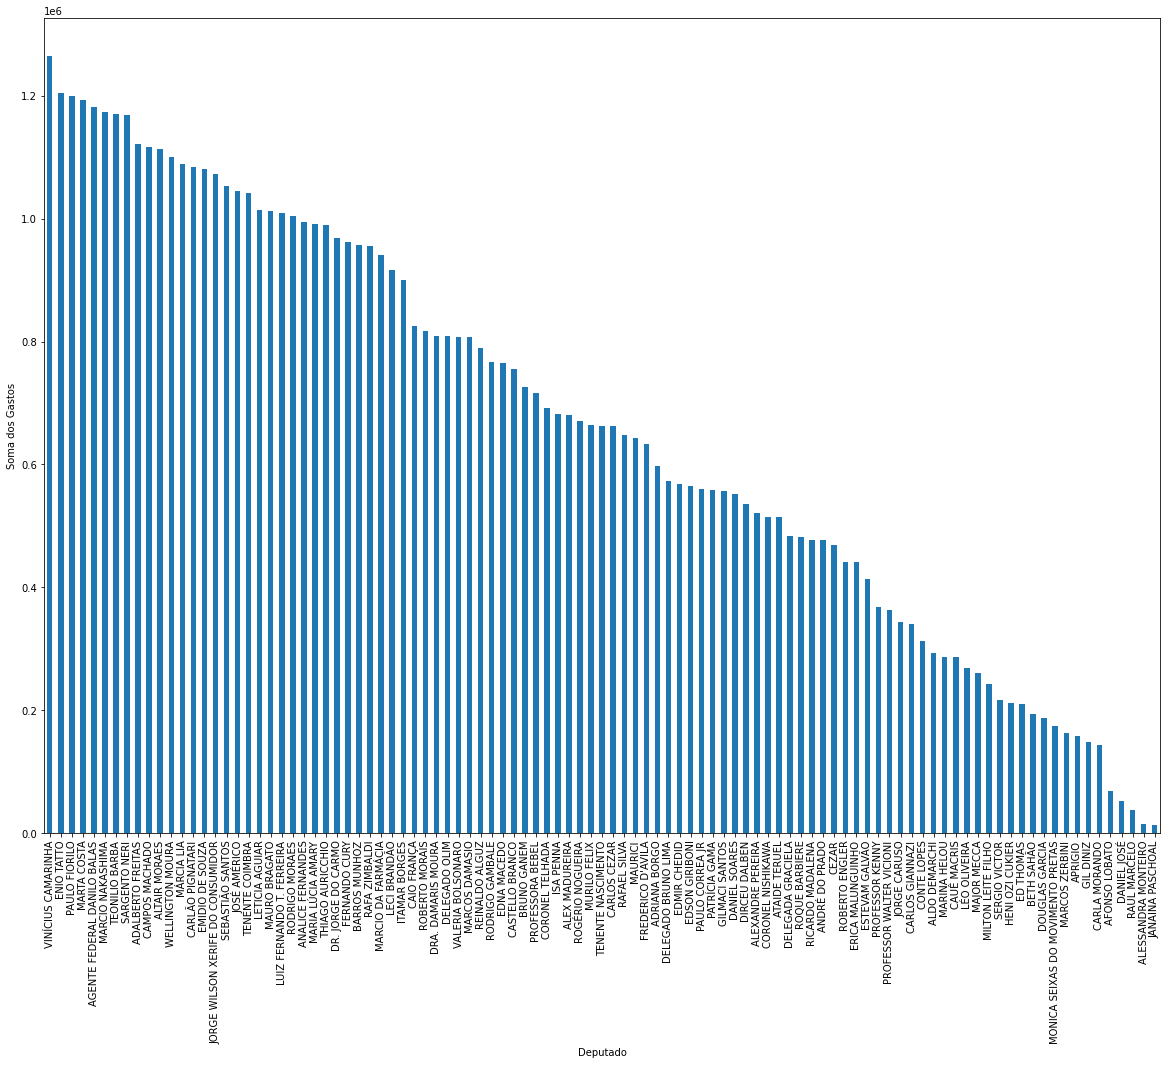

In [ ]:
dfprivate.groupby('Deputado')['Valor'].sum().sort_values(ascending=False).plot.bar(figsize=(20,15),xlabel='Deputado',ylabel='Soma dos Gastos')

In [ ]:
dfprivate.groupby('Fornecedor')['Valor'].sum().sort_values(ascending=False).head(10)

Fornecedor
UNIDAS VEÍCULOS ESPECIAIS S.A.           3664253.77
NEVADA RENT A CAR LTDA                   1389989.98
QUATTROPORTO CONS E NEGOCIOS LTDA         686381.20
NOGUEIRA E NOGUEIRA JUNIOR LTDA           674575.00
MARCOS CARVALHO ELIAS                     539169.39
TELEFONICA BRASIL S.A                     410733.81
TAXCO LOCADORA DE BENS LTDA               402807.84
EDUARDO RAMOS COSTA                       346600.99
MARCELO PEREIRA NUNES                     338825.26
DESIGN VISAO GRAFICA E EDITORA EIRELI     320600.00
Name: Valor, dtype: float64

In [ ]:
df.groupby('CNPJ')['Valor'].sum().sort_values(ascending=False).head(10)

CNPJ
2558157000162.0     12303461.62
02558157000162       9943453.98
66970229000167.0     2843282.76
66970229000167       2489619.73
2491558000142.0      2001451.95
02491558000142       1662801.82
2449992005638.0      1421309.15
11358701000113.0     1396669.45
3067942000185.0      1210221.28
51410672891          1167970.00
Name: Valor, dtype: float64

In [ ]:
dfprivate.groupby('Tipo')['Valor'].sum().sort_values(ascending=False)

Tipo
L - LOCAÇÃO DE BENS IMÓVEIS                                           12358372.38
O - LOCAÇÃO DE VEÍCULO                                                10032134.38
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS     9361043.86
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       6634090.03
K - LOCAÇÃO DE BENS MÓVEIS                                             5994055.06
A - COMBUSTÍVEIS E LUBRIFICANTES                                       5182740.34
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          2984804.38
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)       2774555.79
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              2750755.02
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                    2100772.47
J - SERVIÇOS DE COMUNICAÇÃO                                            1954010.38
N - MORADIA                                                            1681115.46
P - DIVULGA

In [ ]:
df.groupby('Tipo')['Valor'].size().sort_values(ascending=False).head(10)

Tipo
A - COMBUSTÍVEIS E LUBRIFICANTES                                      143904
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                   107877
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)       67330
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              50793
G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES, INTERNET E SOFTWARES       27603
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS     25847
C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS     21246
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       18339
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          17776
L - LOCAÇÃO DE BENS IMÓVEIS                                            15231
Name: Valor, dtype: int64

In [ ]:
df.groupby('Tipo')['Valor'].sum().sort_values(ascending=False).head(10)

Tipo
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS    81097729.26
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)      48566547.28
A - COMBUSTÍVEIS E LUBRIFICANTES                                      47716685.24
L - LOCAÇÃO DE BENS IMÓVEIS                                           47476677.58
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)      40799012.32
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO             22757100.87
J - SERVIÇOS DE COMUNICAÇÃO                                           20148098.98
B - LOCAÇÃO E MANUT DE BENS MÓVEIS E IMÓVEIS, CONDOMÍNIOS E OUTROS    19659189.49
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                   18413474.71
K - LOCAÇÃO DE BENS MÓVEIS                                            16247936.55
Name: Valor, dtype: float64